In [1]:
import pandas as pd

# Cargar dataset Titanic desde un repositorio en linea
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Mostrar primeras filas
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Ver la estructura de los datos
print("Estructura de datos", df.info())

# Resumen estadistico de las variables numericas
print("Resumen estadistico", df.describe())

# Ver las columnas disponibles
print("Columnas del dataset:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Estructura de datos None
Resumen estadistico        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0

In [6]:
# Ver cuantos valores faltantes tiene cada columna
print(df.isnull().sum())

# Rellenar valores faltantes en "Age" con la media
df["Age"].fillna(df["Age"].mean(), inplace=True)

# Rellenar valores faltantes en "Embarked" con el valor mas frecuente
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-3816580707.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
/tmp/ipython-input-3816580707.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [7]:
# Filtrar pasajeros menores de 18 anos
menores = df[df["Age"] < 18]
print("Cantidad de menores:", len(menores))

# Filtrar mujeres que sobrevivieron
mujeres_sobrevivientes = df[(df["Sex"] == "female") & (df["Survived"] == 1)]
print("Cantidad de mujeres sobrevivientes:", len(mujeres_sobrevivientes))

Cantidad de menores: 113
Cantidad de mujeres sobrevivientes: 233


In [11]:
# Tasa de supervivencia global
tasa_global = df["Survived"].mean()
print("Tasa de supervivencia global:", tasa_global)

# Tasa de supervivencia por genero
tasa_por_genero = df.groupby("Sex")["Survived"].mean()
print("Tasa de supervivencia por genero:\n", tasa_por_genero)

# Tasa de supervivencia por clase de boleto
tasa_por_clase = df.groupby("Pclass")["Survived"].mean()
print("Tasa de supervivencia por clase de boleto:\n", tasa_por_clase)

Tasa de supervivencia global: 0.3838383838383838
Tasa de supervivencia por genero:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Tasa de supervivencia por clase de boleto:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


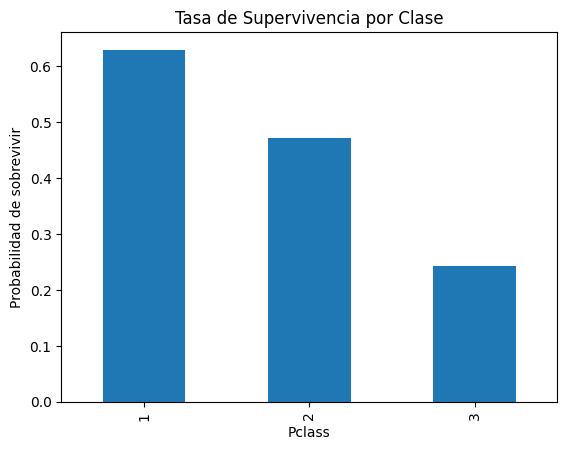

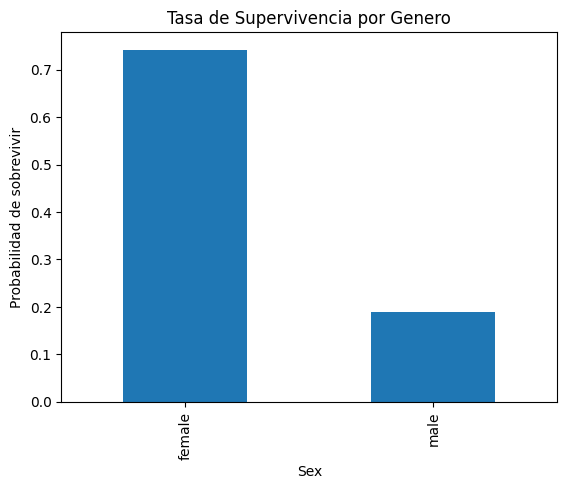

In [13]:
import matplotlib.pyplot as plt

# Supervivencia por clase
tasa_por_clase.plot(kind="bar", title="Tasa de Supervivencia por Clase",
                    ylabel = "Probabilidad de sobrevivir")
plt.show()

# Supervivencia por genero
tasa_por_genero.plot(kind="bar", title="Tasa de Supervivencia por Genero",
                     ylabel = "Probabilidad de sobrevivir")
plt.show()